# 半導体セクター比較

材料メーカー vs. 製造装置

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

In [32]:
def weekly_chart(ticker: yf.Ticker) -> pd.DataFrame:
    df = ticker.history(interval='1d', period='1y')

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        mav=(13, 26, 52),
        volume=False,
        datetime_format='%Y-%m-%d',
        xrotation=0,
        ax=ax,
    )
    ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' % (ticker.info['longName'], ticker.info['symbol']))
    ax.grid()

    return df

## 東京エレクトロン

                                   Open          High           Low  \
Date                                                                  
2023-10-02 00:00:00+09:00  20224.829594  20259.292546  19855.583679   
2023-10-03 00:00:00+09:00  19737.423947  19899.892142  19579.879032   
2023-10-04 00:00:00+09:00  19151.554565  19318.946045  18974.316528   
2023-10-05 00:00:00+09:00  19397.718932  19466.644837  19122.015313   
2023-10-06 00:00:00+09:00  19200.786374  19407.564073  18910.312939   

                                  Close   Volume  Dividends  Stock Splits  
Date                                                                       
2023-10-02 00:00:00+09:00  19870.353516  3367200        0.0           0.0  
2023-10-03 00:00:00+09:00  19668.498047  3070300        0.0           0.0  
2023-10-04 00:00:00+09:00  19062.935547  3457700        0.0           0.0  
2023-10-05 00:00:00+09:00  19451.875000  3023100        0.0           0.0  
2023-10-06 00:00:00+09:00  19141.707031  30935

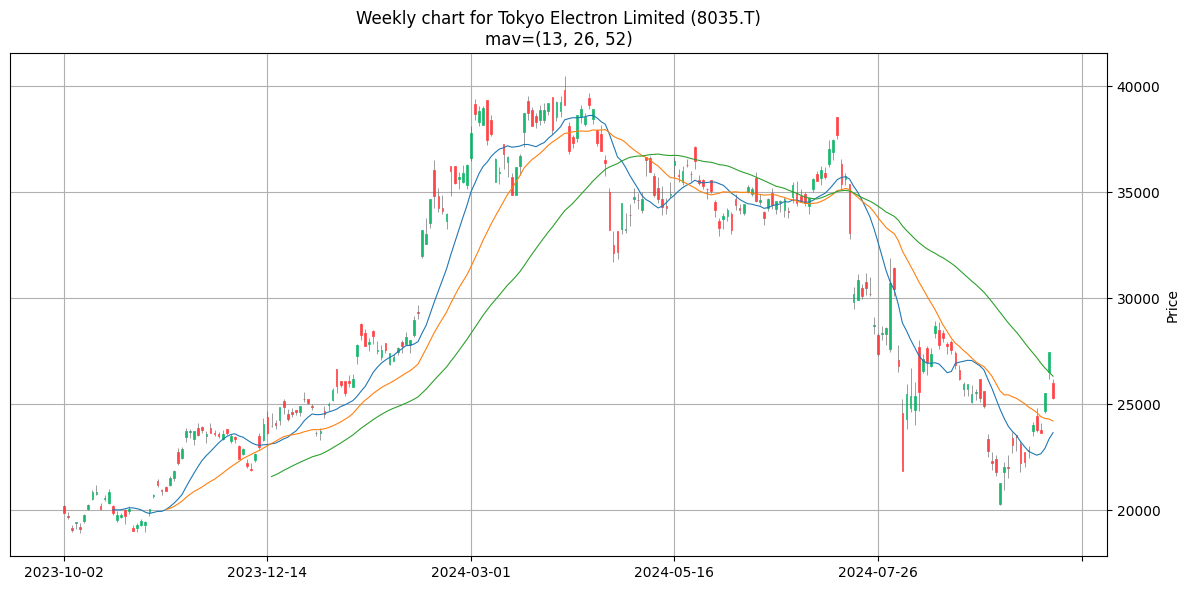

In [33]:
symbol1 = '8035.T' # 東京エレクトロン
ticker1 = yf.Ticker(symbol1)
df1 = weekly_chart(ticker1)
print(df1.head())
print(df1.tail())
plt.tight_layout()
plt.savefig('weekly_chart_8035.png')
plt.show()

## 信越化学

                                  Open         High          Low        Close  \
Date                                                                            
2023-10-02 00:00:00+09:00  4296.076074  4348.227250  4273.444432  4292.140137   
2023-10-03 00:00:00+09:00  4280.331637  4282.299605  4235.068360  4239.988281   
2023-10-04 00:00:00+09:00  4132.734180  4176.029491  4122.894337  4149.461914   
2023-10-05 00:00:00+09:00  4152.414255  4219.325195  4136.670504  4219.325195   
2023-10-06 00:00:00+09:00  4218.341113  4253.764552  4207.517285  4210.469238   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-10-02 00:00:00+09:00  6423300        0.0           0.0  
2023-10-03 00:00:00+09:00  5815100        0.0           0.0  
2023-10-04 00:00:00+09:00  7150700        0.0           0.0  
2023-10-05 00:00:00+09:00  6965700        0.0           0.0  
2023-10-06 00:00:00+09:00  5724400        0.0           0.0 

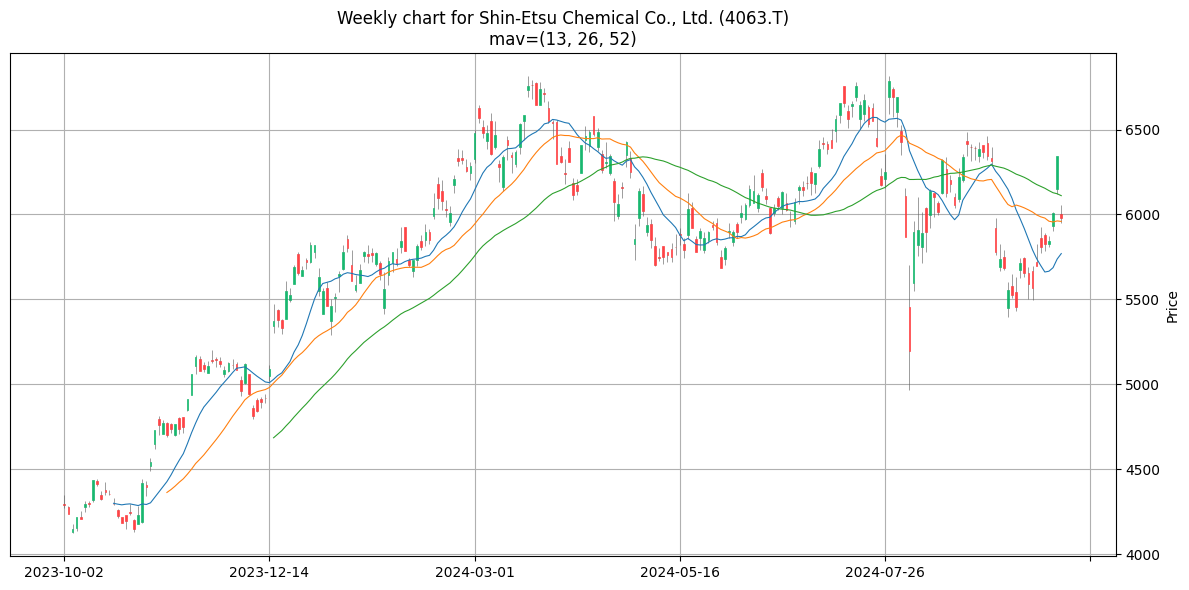

In [34]:
symbol2 = '4063.T' # 信越化学
ticker2 = yf.Ticker(symbol2)
df2 = weekly_chart(ticker2)
print(df2.head())
plt.tight_layout()
plt.savefig('weekly_chart_4063.png')
plt.show()

In [35]:
def change_ratio(ticker, df):
    ser = pd.Series(df['Close'])
    origin = ser.iloc[0]
    return pd.Series([(v - origin) / origin for v in ser], name=ticker.info['symbol'], index=df.index)

In [36]:
series1 = change_ratio(ticker1, df1)
series2 = change_ratio(ticker2, df2)

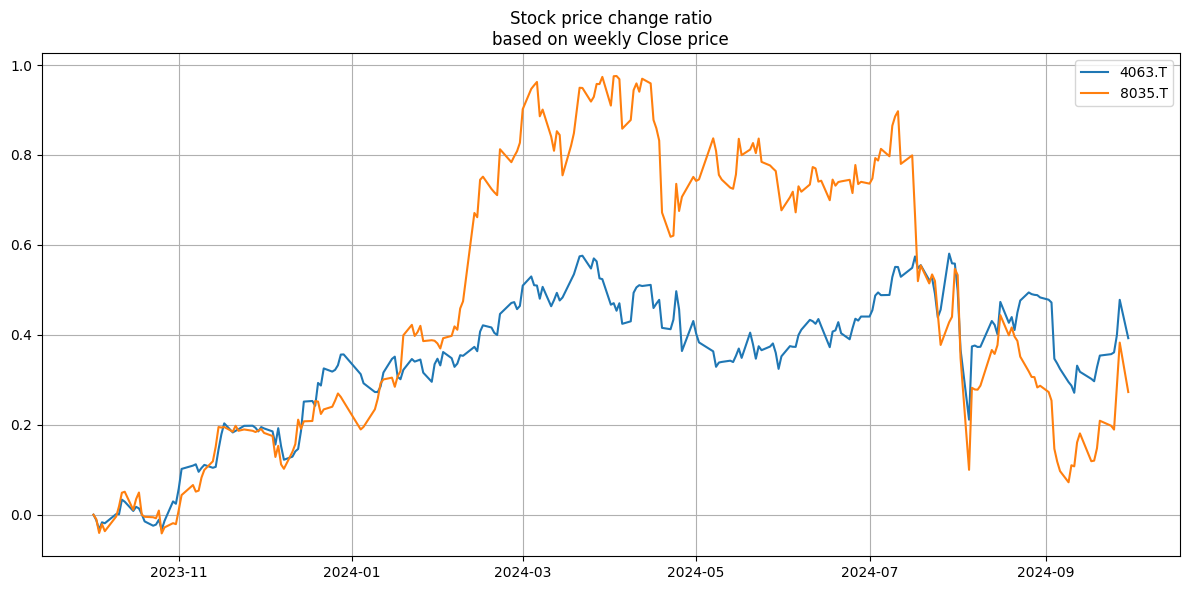

In [37]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(series2, label=series2.name)
ax.plot(series1, label=series1.name)

ax.set_title('Stock price change ratio\nbased on weekly Close price')

plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('weekly_chart_4063_8035.png')

plt.show()